# Лабораторная работа 3.
## Численное решение нелинейных уравнений
Написать программу для численного решения нелинейных уравне- ний.
1. Реализовать метод деления отрезка пополам.
2. Реализовать методы секущей, секущих и Ньютона. Предусмотреть оценку кратности корня.
3. Реализовать метод Ньютона для системы нелинейных уравнений. При решении возникающих линейных систем воспользоваться ре- зультатами лабораторной работы 2.

## Метод деления отрезков пополам

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = lambda x: np.exp(-x)-x**2

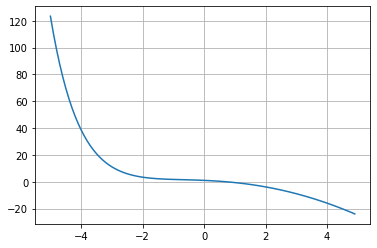

In [3]:
x = np.arange(-5, 5, 0.1)
plt.plot(x, f(x))
plt.grid()
plt.show()

Answer:  0.7035064697265625


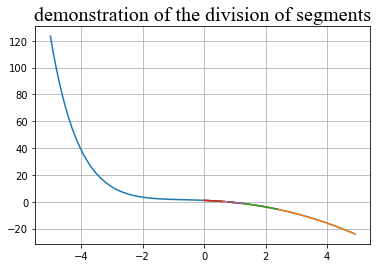

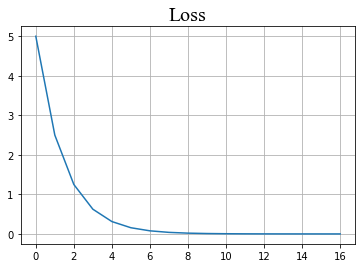

In [5]:
a = -5
b = 5
answer = 0.7034674224985338
loss = np.array([])
eps = 0.0001
step = 0

while b - a > eps:
    x = np.arange(a, b, 0.1)
    plt.plot(x, f(x))
    x = (a+b)/2
    if f(a)*f(x) < 0:
        b = x
    else:
        a = x
    loss = np.append(loss, np.abs(b - a))
    step += 1
    
print("Answer: ", x)

plt.title('demonstration of the division of segments', fontsize=20, fontname='Times New Roman')
plt.grid()
plt.show()


plt.plot(np.arange(0, step, 1), loss)
plt.title('Loss', fontsize=20, fontname='Times New Roman')
plt.grid()
plt.show()


## Метод Ньютона
$$ Иттерационный \ метод: \newline 
x_{k+1} = x_{k} - \frac{f(x_{k})}{f'(x_{k})}, \ \ \ \ где f(x) = 0$$
$$\newline$$
$$Возьмем \ функцию: \newline x^3 - 3 = 0$$

Our answer:  0.0002776923191236493
multiplicity:  3.99999981213616


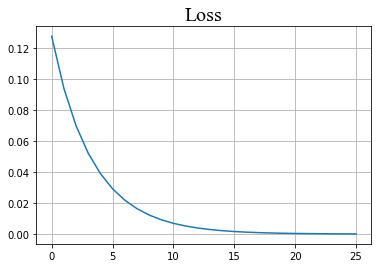

In [9]:
f = lambda x: x**3 * np.sin(x)
f_der =  lambda x: 3*x**2 * np.sin(x) + x**3 * np.cos(x)
x_ = 0.5
x_old = x_ - 0.4

loss = np.array([])
eps = 0.0001
step = 0

while True:
    x = x_ - f(x_)/f_der(x_)
    
    q = (x - x_) / (x_ - x_old) # для кратности 
    loss = np.append(loss, np.abs(x_ - x))
    step += 1
    if abs(x_ - x) < eps:
        break
    x_old = x_
    x_ = x
    
p = 1 / (1 - q)
print("Our answer: ", np.sin(x))
print("multiplicity: ", p)

plt.plot(np.arange(0, step, 1), loss)
plt.title('Loss', fontsize=20, fontname='Times New Roman')
plt.grid()
plt.show()

## Метод секущих 
$$Тоже \ самое, \ что \ и \ метод \ Ньютона, \ но \newline
f'(x_k) = \frac{f(x_k) - f(x_{k-1})}{x_k - x_{k-1}}
\Rightarrow \newline
\Rightarrow x_{k+1} = x_{k} - \frac{f(x_{k})}{f(x_{k}) - f(x_{k-1})} (x_k - x_{k-1}) \newline
$$
$$Возьмем \ ту \ же \ функцию: \newline x^3 - 3 = 0$$

Our answer 1.4422495107992976


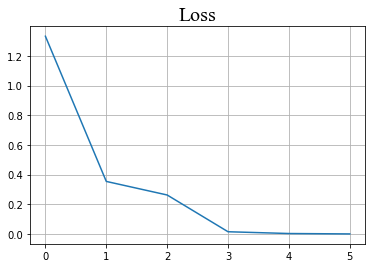

In [19]:
f = lambda x: x**3 - 3
x0 = 1.5
x1 = 1e-4
loss = np.array([])
step = 0
eps = 0.0001
while True:
    if (f(x1) - f(x0)) == 0:
        break
    x = x1 - f(x1) * (x1 - x0)/(f(x1) - f(x0))
    x0 = x1
    step += 1
    loss = np.append(loss, np.abs(x1 - x))
    if np.abs(x1 - x) < eps:
        break
    x1 = x 
    
print("Our answer", x)

plt.plot(np.arange(0, step, 1), loss)
plt.title('Loss', fontsize=20, fontname='Times New Roman')
plt.grid()
plt.show()

## Метод Ньютона для системы нелинейных уравнений 

In [37]:
def gauss(A, B):
    row = []
    for i in range(len(A)):
        row.append(i)
    
    def DivideRow(A, B, row, divider): # функция деления row на divider
        A[row] /= divider
        B[row] /= divider
    
    def CombineRows(A, B, row, source_row, weight): # вычитание строки с другой умноженную на константу
        A[row] = A[row] - weight*A[source_row]
        B[row] = B[row] - weight*B[source_row]
    
    for col in range(len(A)):
        row1 = [i for i in row]
        row1.remove(col)
        DivideRow(A, B, col, A[col][col])
        for i in row1:
            CombineRows(A,B, i,col,A[i][col])
    return B


def matrix_jac(Jacob, xn):
    res = np.zeros((len(Jacob), len(Jacob)))
    
    for i in range(len(Jacob)):
        for j in range(len(Jacob)):
            res[i][j] = Jacob[i][j](xn)
            
    return res

def vector_func(F, xn):
    res = np.zeros(len(F))
    
    for i in range(len(F)):
        res[i] = F[i](xn)
            
    return res

def Newton(F, Jacob, x_old, eps):
    while True:
        
        A = matrix_jac(Jacob, x_old)
        B = A.dot(x_old) - vector_func(F, x_old)
        
        x_new = gauss(A, B)
        
        if np.all(np.abs((x_old - x_new))) < eps:
            break
        
        x_old = x_new
    
    return x_new

$$
    \\
    \begin{cases}
    x^3 + y^2 = 0 \\
    x^3 + y^5 -1 = 0
    \end{cases}
    \\
$$

In [51]:
f1 = lambda x: x[0]**3 + x[1]*x[1]
f2 = lambda x: x[0]**3 + x[1]**5 - 1
f1_x = lambda x: 3*(x[0]**2)
f1_y = lambda x: 2*x[1]
f2_x = lambda x: 3*(x[0]**2)
f2_y = lambda x: 5*(x[1]**4)

F = np.array([f1, f2])

Jacob = np.array([[f1_x, f1_y],
         [f2_x, f2_y]])

In [54]:
x0 = [-5, 5]
print(Newton(F, Jacob, x0, 1e-4))

[-1.12538741  1.19385911]


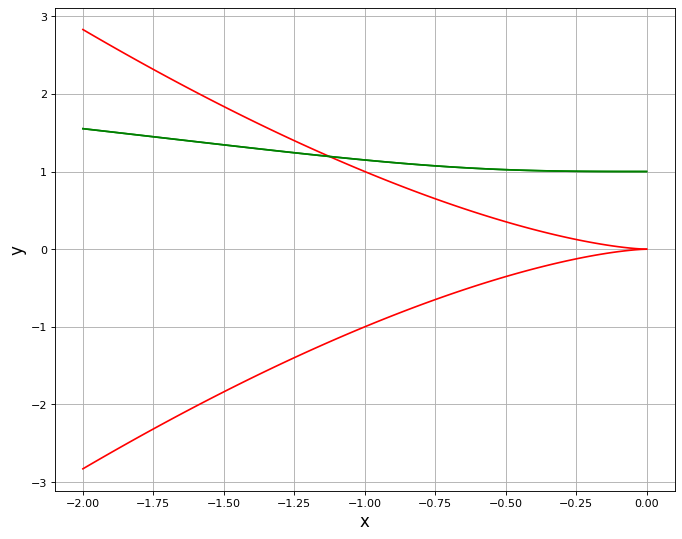

In [74]:
x = [i for i in np.linspace(-2, 0, 100)]

y1 = [pow(-x, 3/2) for x in x]
y2 = [(1 - x**3)**(1/5) for x in x]
y3 = [-pow(-x, 3/2) for x in x]
y4 = [(1 - x**3)**(1/5) for x in x]
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(x, y1, color='red')
plt.plot(x, y2, color='green')
plt.plot(x, y3, color='red')
plt.plot(x, y4, color='green')
plt.ylabel('y', fontsize=15)
plt.xlabel('x', fontsize=15)

plt.grid(True)
plt.show()